In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_pickle('df_GHI.plk')
columns = ['Timestamp','GHI']
df = df[columns]
df = df.reset_index(drop=True)
df.rename(columns={'Timestamp': 'ds', 'GHI': 'y'}, inplace=True)
df.head()

,ds,y
0,2022-02-21 18:00:00,0.002335
1,2022-02-21 18:10:00,0.000274
2,2022-02-21 18:20:00,0.000000
3,2022-02-21 18:30:00,0.000000
4,2022-02-22 05:00:00,0.000245


In [3]:
fecha_de_corte = '2023-12-31'

train_set = df[df['ds'] <= fecha_de_corte]
test_set = df[df['ds'] > fecha_de_corte]

In [6]:
m = Prophet()
m.fit(train_set)

15:43:47 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = test_set[['ds']].copy() 

In [30]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2023-12-31 05:00:00,-0.011192,-0.195845,0.168705
1,2023-12-31 05:10:00,-0.016200,-0.191483,0.163157
2,2023-12-31 05:20:00,-0.018434,-0.197127,0.159023
3,2023-12-31 05:30:00,-0.017899,-0.197662,0.175414
4,2023-12-31 05:40:00,-0.014628,-0.196097,0.166375


In [35]:
x = test_set[['y']]
real = test_set[['ds']]
predict = forecast[['ds','yhat']]
predict_subset = predict[predict['ds'].isin(real['ds'])]
predict_subset = predict_subset[['yhat']]

In [37]:
print(len(predict_subset))
print(len(real))
print(len(x))

5494
5494
5494


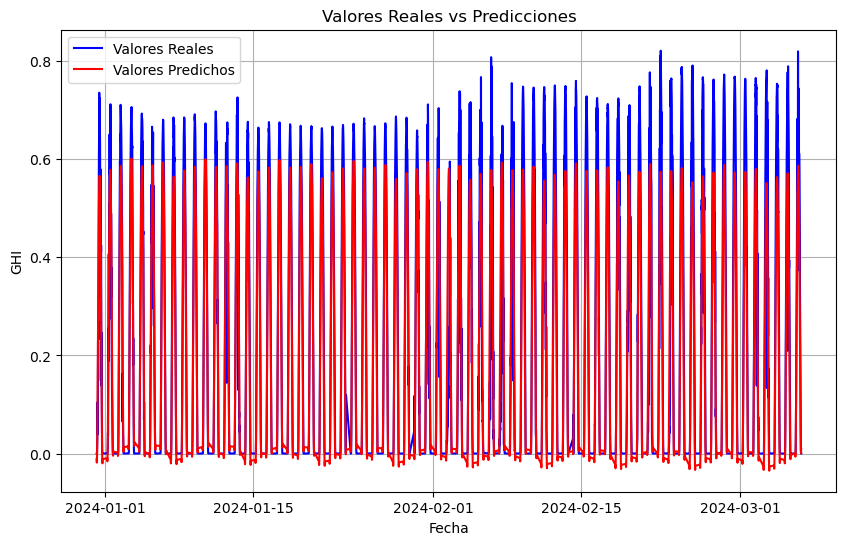

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(real_values, actual_values, label='Valores Reales', color='blue')
plt.plot(real_values, predicted_values, label='Valores Predichos', color='red')

plt.title('Valores Reales vs Predicciones')
plt.xlabel('Fecha')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()

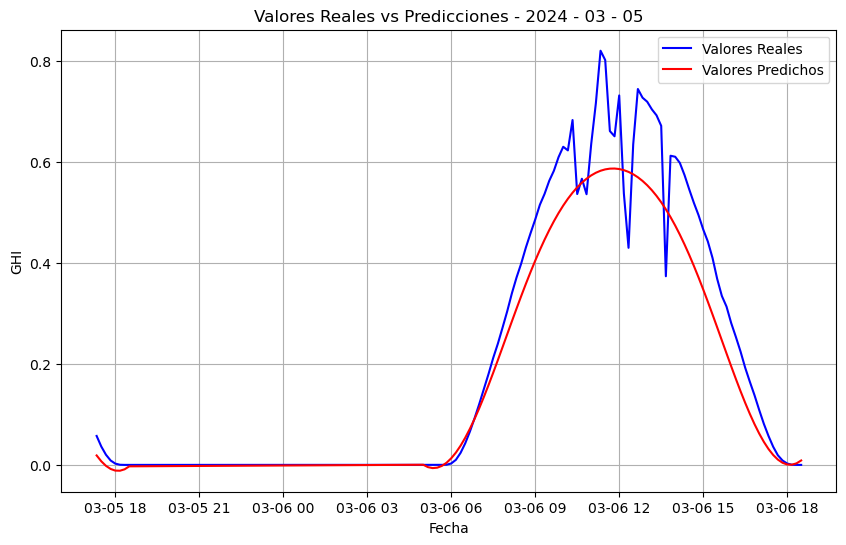

In [48]:
# Filtra los últimos 6 puntos (que corresponden a la última hora en intervalos de 10 minutos)
real_values_last_hour = real['ds'].iloc[-90:]
predicted_values_last_hour = predict['yhat'].iloc[-90:]
actual_values_last_hour = x['y'].iloc[-90:]

# Grafica solo la última hora
plt.figure(figsize=(10, 6))
plt.plot(real_values_last_hour, actual_values_last_hour, label='Valores Reales', color='blue')
plt.plot(real_values_last_hour, predicted_values_last_hour, label='Valores Predichos', color='red')
plt.title('Valores Reales vs Predicciones - 2024 - 03 - 05')
plt.xlabel('Fecha')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
mae_last_hour = mean_absolute_error(actual_values_last_hour, predicted_values_last_hour)
print(f"MAE (Última Hora): {mae_last_hour}")

MAE (Última Hora): 0.06839881881694143
